**TRAIL-1**

*about smote and imblearn*

What’s an imbalanced dataset?

Imagine you’re training a model to detect spam emails:

You have 100 emails: 95 are "not spam" (majority class), and only 5 are "spam" (minority class).
The model might just predict "not spam" all the time because it’s easier and gets 95% accuracy, ignoring the spam emails entirely.

Why use SMOTE?

SMOTE helps by balancing the dataset. Instead of having way more "not spam" than "spam," it creates fake but realistic "spam" examples to even things out. This way, the model learns to pay attention to both classes.

How does SMOTE work?

It looks at the minority class (e.g., the 5 spam emails).
It picks a spam email and finds its "neighbors" (other similar spam emails).
It creates new "fake" spam emails by mixing the features of the original spam email and its neighbors. Think of it like blending two similar recipes to make a new one.
Now your dataset has more spam examples, so it’s more balanced.
(In simple terms , smote creates fake-real values to make balance the datasets)

*Cross-validation splits your data into multiple "folds" (e.g., 5 parts). It trains and tests the model multiple times, each time using a different fold as the test set and the rest as the training set.
cross_val_score runs this process and gives you a list of scores (e.g., accuracy, F1-score) for each fold, so you can see how stable and reliable your model is.

*RandomizedSearchCV is a tool in scikit-learn for hyperparameter tuning. It searches for the best settings (hyperparameters) for your model by trying random combinations.

*Use RandomizedSearchCV to find the best hyperparameters.
*Use cross_val_score to confirm the tuned model’s performance.
*Finally, use train_test_split to train the tuned model on the training set and evaluate it on the test set for a final check.

1. Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #(LabelEncounter)converts categorical data into numerical values
from imblearn.over_sampling import SMOTE #Synthetic Minority Over-Sampling Technique (Handles imbalance DataSets(imblearn), like "Fraud" has fewer values than "NonFraud")
#SMOTE balances the datasets by creating artificial examples of minority class rather than duplicating existing ones
#imblearn - imbalanced learn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV #splits datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

2. Data Loading and Analysing

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


Inspection of Data

In [ ]:
print(f"Dimension:{df.shape}")
df.head()
df.tail()

Dimension:(800, 22)


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
#display all columns of DataFrame
pd.set_option('display.max_columns',None) #although we see all columns but recommended to use it :)
pd.set_option('display.max_rows',None)
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


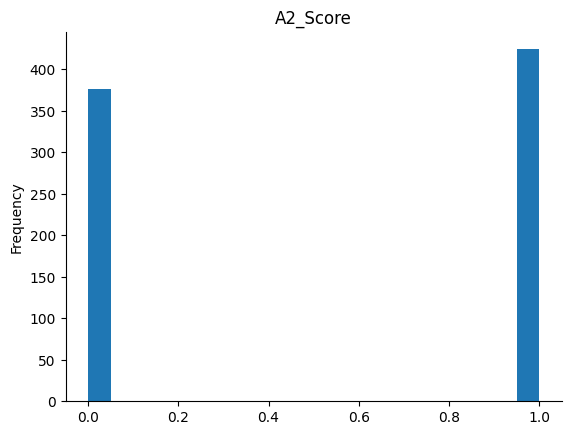

In [ ]:
# @title A2_Score

from matplotlib import pyplot as plt
df['A2_Score'].plot(kind='hist', bins=20, title='A2_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#as age is in float , convt it to INT
df["age"] = df["age"].astype(int)
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


**ANALYSING DATA**

In [ ]:
#getting the unique values(attributes/features) by for loop
for col in df.columns:
  numerical_features = ["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
#dropping ID & age_desc columns
df = df.drop(columns =["ID","age_desc"])

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
# define the mapping dictionary for country names (then later pass it to replace function)
mapping = {
    "Viet Nam":"Vietnam",
    "Hong Kong": "China",
    "AmericanSamoa":"United States"

}

#replace values in country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
#target class distribution
df["Class/ASD"].value_counts() #we can see theres !:6 ratio :(

,count
Class/ASD,
0,639
1,161


**INSIGHTS:**

1.missing values in ethnicity and relation
2.age_desc col is removed(has only 1 unique value)
3.fixed country names
4.identified class imbalance in the target column



step3 : EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns.unique() #df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
#so what can be observed from the below description
#if the mean value is 0.5 range, the values are evenly distributed, if < 0.49 the 0s are more , > then 1s are more (thats how you understand )
#

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


UNIVARIATE ANALYSIS
(meaning analysing each individual variable, bi means co relation of two variables)

Numerical Columns:
*   age
*   result

In [ ]:
#drawing plots to understand distribution(histogram, box plot-detects outliers)

In [ ]:
#set the desired theme( using seaborn )
#ask gemini if needed
sns.set_theme(style = "darkgrid")

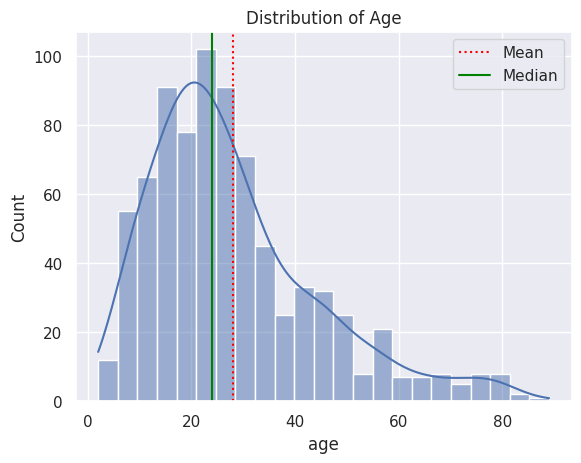

In [ ]:
#Histogram for "age"
#KDE is kernel density estimate - is a smooth curve that reps PDF of data (draws a curve)
sns.histplot(df["age"],kde =True)
plt.title("Distribution of Age")

#calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

#add vertical lines for mean and median
plt.axvline(age_mean, color = "red", linestyle = ":", label = "Mean")
plt.axvline(age_median, color = "green", linestyle = "-", label = "Median") #linewidth be default

plt.legend() # this basically creates a label mark on the graph


plt.show() #we are getting a right skew(outliers on that side) , ( greater mean value )


In [ ]:
# as we are using only TREE models, we dont require a uniform distributed data (skewed is FINE)
# for lin Reg, log Reg, SVM they require normal or uniform distributed data -> StandardScalar is required to uniform the data

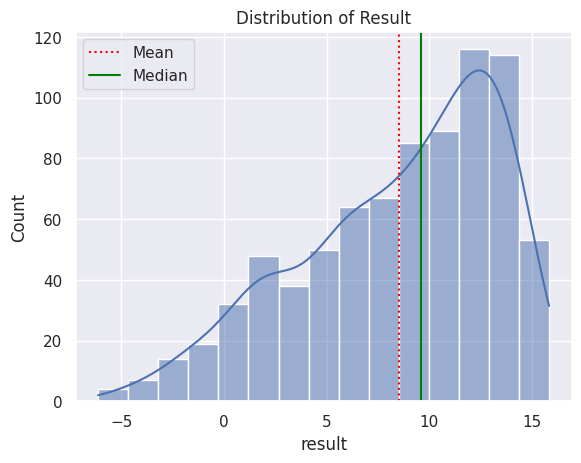

In [ ]:
#Histogram for "result"
sns.histplot(df["result"],kde = True)
plt.title("Distribution of Result")

result_mean = df["result"].mean()
result_median = df["result"].median()

#ploting mean and median
plt.axvline(result_mean, color = "red", linestyle = ":", label = "Mean")
plt.axvline(result_median, color = "green", linestyle = "-", label = "Median")

plt.legend()
plt.show() # left skew ( lesser mean value)

BOX PLOT for identifying outliers in numerical colms

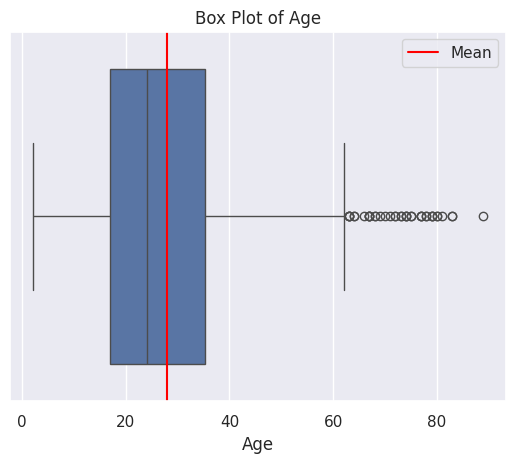

In [ ]:
#Box plot
sns.boxplot(x = df["age"]) # "x=" is important beacuse it generates in x-axis
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.axvline(age_mean, color = "red", linestyle = "-", label = "Mean")
plt.legend()
plt.show() #the dots we see are outliers

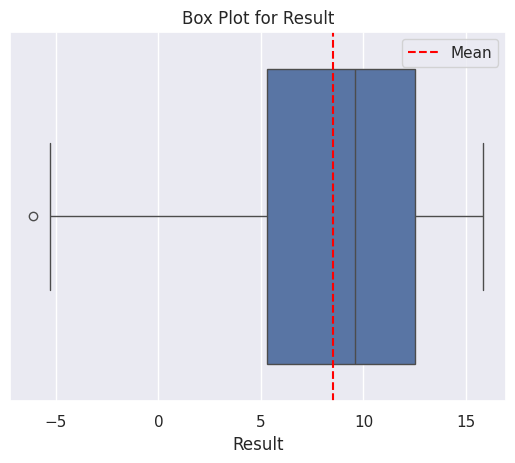

In [ ]:
#box plot for result
sns.boxplot(x = df["result"])
plt.title("Box Plot for Result")
plt.xlabel("Result")
plt.axvline(result_mean, color = "red", linestyle = "dashed", label = "Mean")
plt.legend()
plt.show() # bro shi, only one outlier

In [ ]:
#count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1 #Inter Quantile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)] # | -> OR, filtering data

In [ ]:
age_outliers.shape
len(age_outliers)

39

In [ ]:
# outliers in result
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)

IQR = Q3 -Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [ ]:
result_outliers.shape
len(result_outliers)

1

Univariate analysis for Categorical Values

*As we are working with trees, the numerical outliers are not much affected*

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

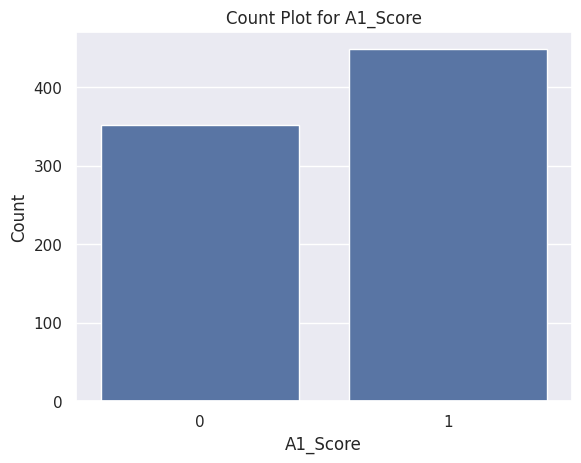

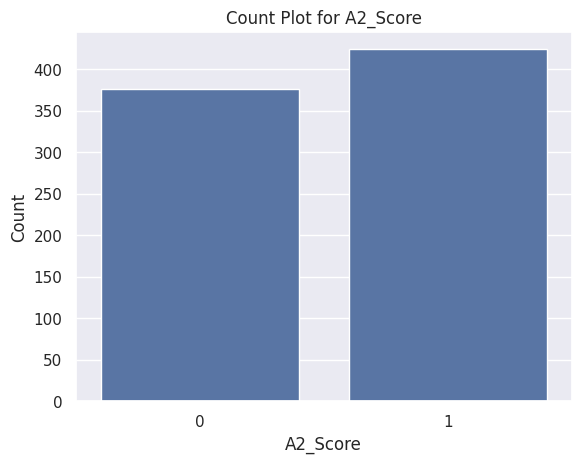

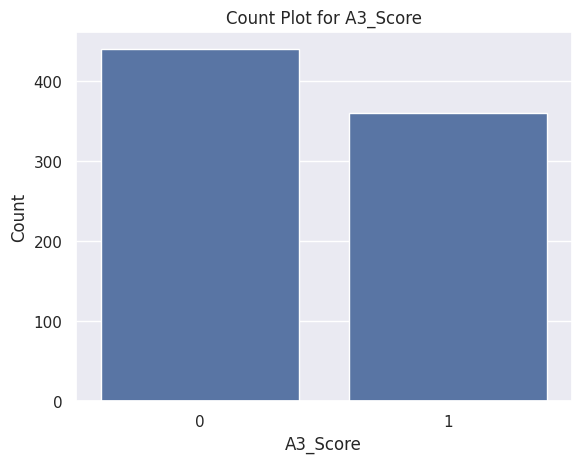

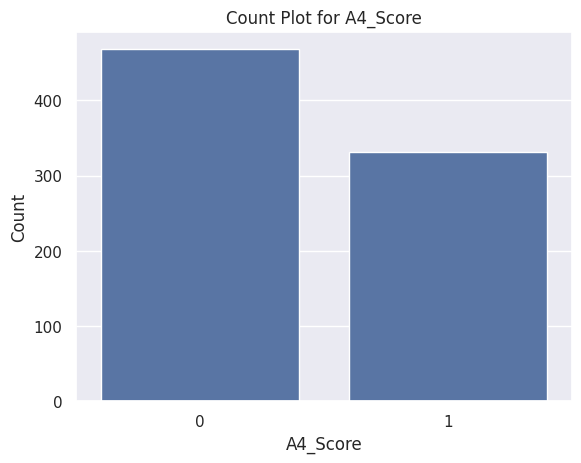

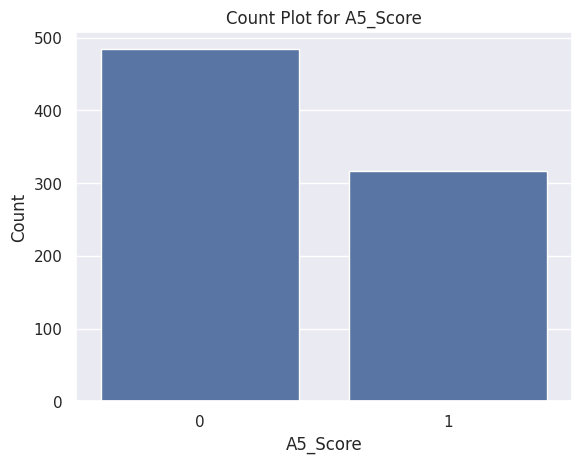

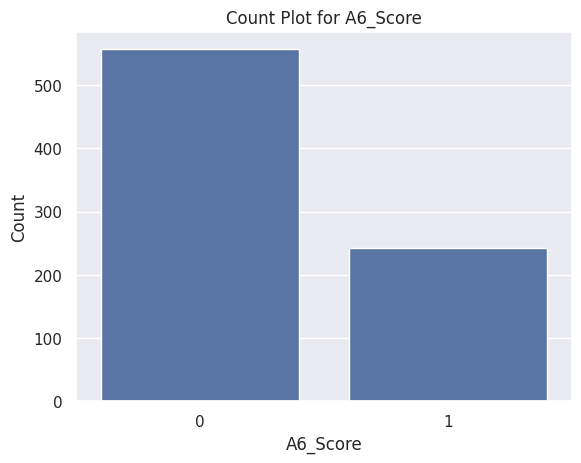

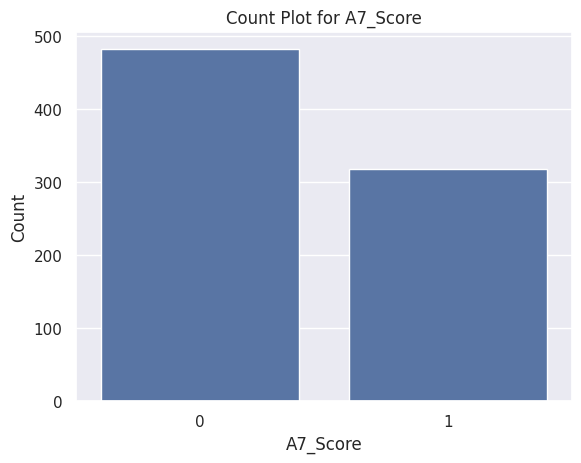

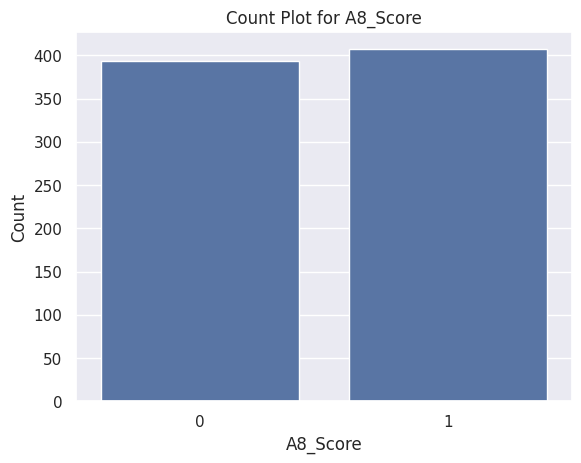

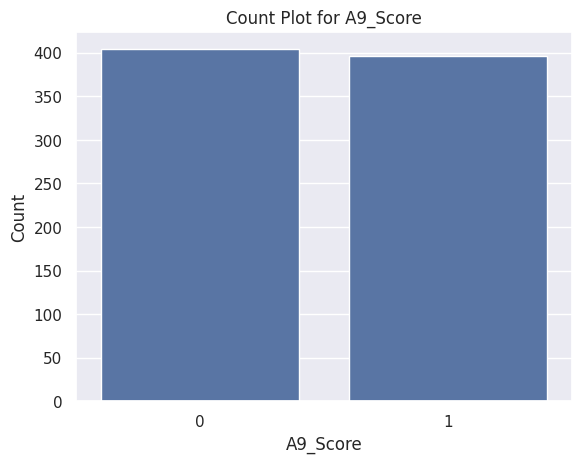

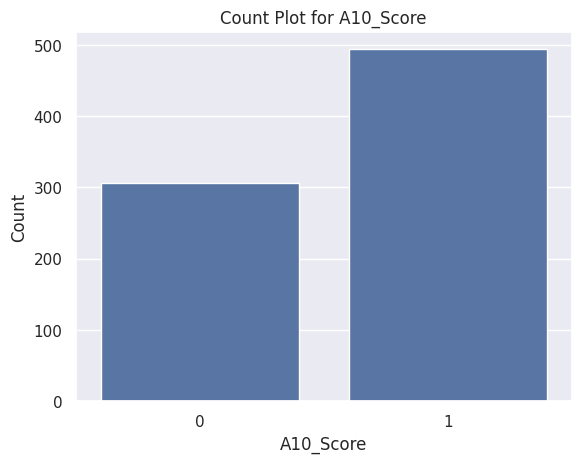

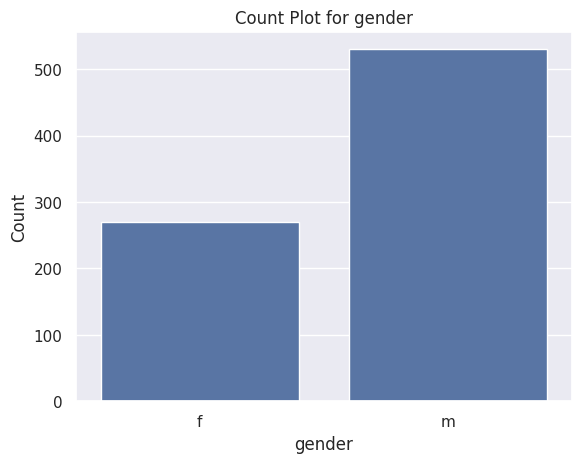

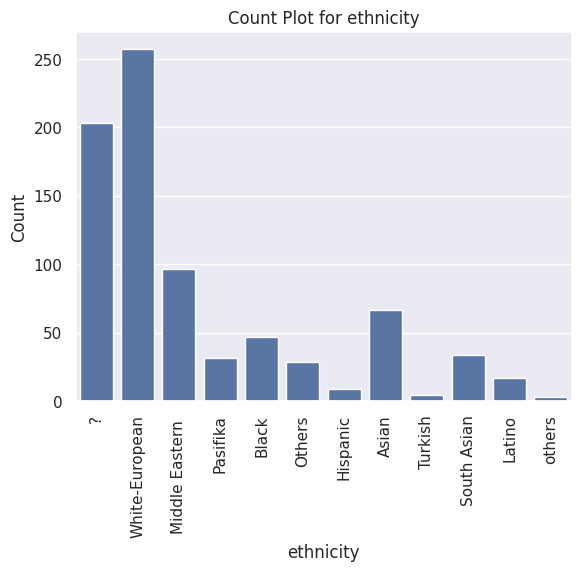

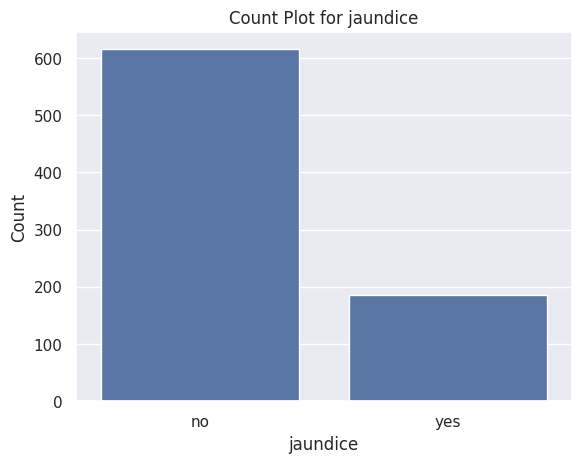

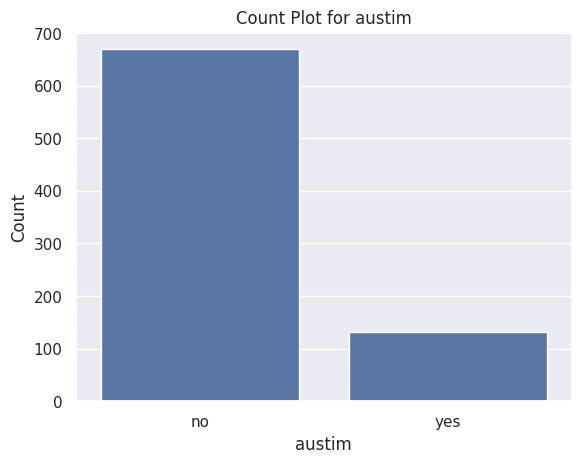

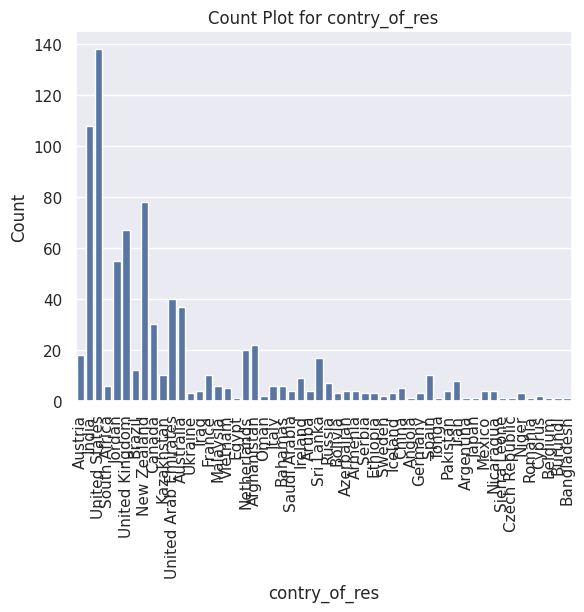

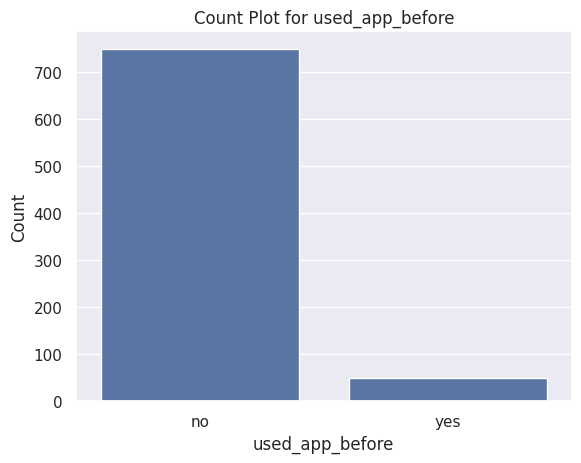

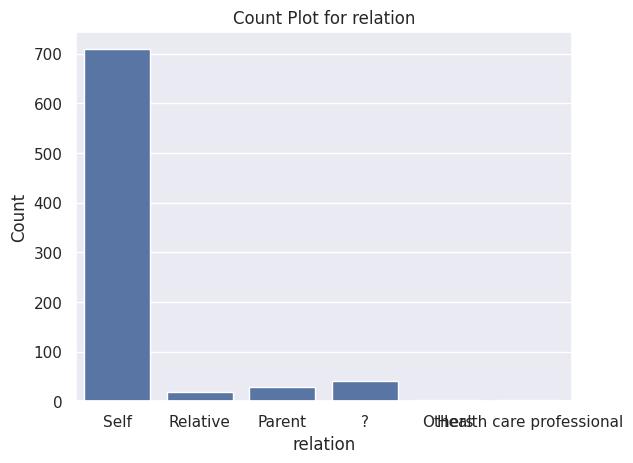

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

# iterating on each column
for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  if col == "contry_of_res" or col == "ethnicity":
    plt.xticks(rotation = 90)
  plt.show()

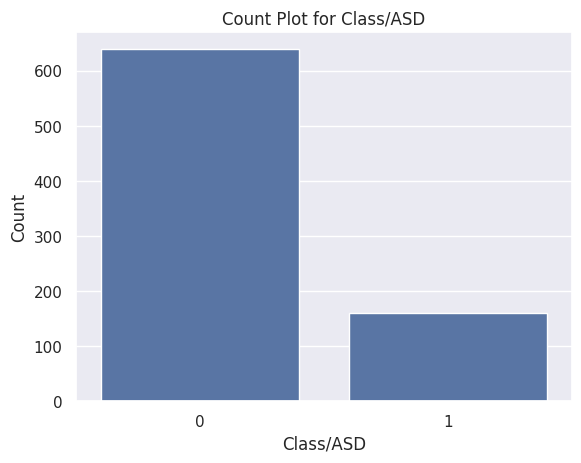

In [ ]:
# countplot for target variable CLASS/ASD
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


HANDLING missing values in ethnicity and relation

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})

In [ ]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df["relation"] = df["relation"].replace({
    "Relative":"Others",
    "Parent":"Others",
    "?":"Others",
    "Health care professional":"Others"
})

In [ ]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

Label Encoding

In [ ]:
# identifying columns with "object" data type
object_columns = df.select_dtypes(include = ["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders = {}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoders as a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()
#As we can see the object attributes/Labels are turned into numeric values

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1ZSKvTqkptgTdb1hYdvZhfooTjyAVRn3Rlc4AoZR1KQQ/edit#gid=0


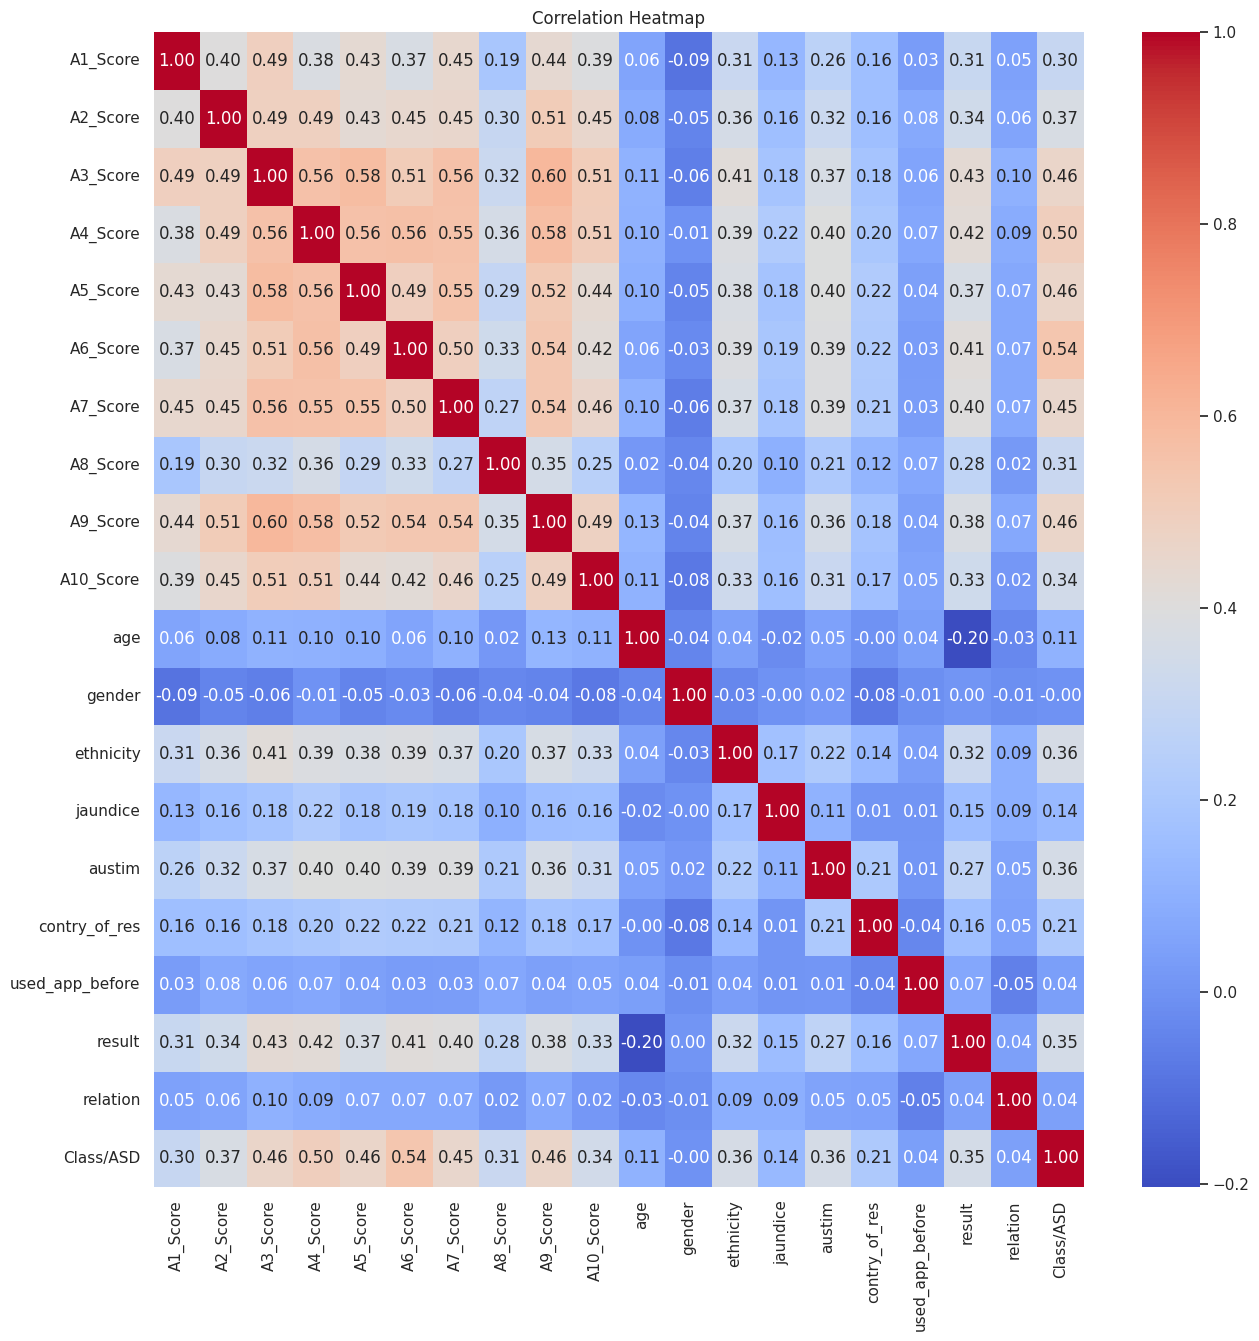

In [ ]:
#correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot= True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# we dont have highly correlated columns , i.e "i" +ve or -ve ,so we dont have to drop columns

Insights from EDA:

- There are few outliers in the numerical columns(age,results)
- There is class imbalance in the target column
- There is class imbalance in the categorical features
- we dont have any highly corelated column
- performed label encoding and saved encoders

STEP 4: DATA PREPROCESSING

Handling the outliers

In [ ]:
# Function to replace the outliers with median
def replace_outliers_with_median(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  median = df[column].median()
  print(median)
  #replace outliers with median
  df[column] = df[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
  return df
  # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
  #                       df[column].median(),
  #                       df[column])

In [ ]:
#replace the outliers in the "age" column
df = replace_outliers_with_median(df,"age")

#replace the outliers in the "result" column
df = replace_outliers_with_median(df,"result")


24.0
9.605299308


In [ ]:
df.shape

(800, 20)

Train Test Splits

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
X = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42) #(rs41) we can keep up with our ytr

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((640, 19), (160, 19), (640,), (160,))

In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


USING SMOTE

In [ ]:
smote = SMOTE(random_state =42)

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


STEP 5: MODEL TRAINING

In [ ]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

Learn CROSS VALIDATON from siddarthan

In [ ]:
# dictionary to store cross validaton results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default paramerters---")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv = 5, scoring = "accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross Validaton Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default paramerters---
Decision Tree Cross Validaton Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default paramerters---
Random Forest Cross Validaton Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default paramerters---
XGBoost Cross Validaton Accuracy: 0.90
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

STEP 6: MODEL SELECTION AND HYPER PARAMETER TUNING

In [ ]:
#Initializing models
decison_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
#Hyper parameter grids for RandomisedSearchCV
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5,0.7,1.0],
    "colsample_bytree": [0.5,0.7,1.0]
}

In [ ]:
#hyper parameter tuning for 3 tree based models
# the below steps can be automated by using for loop or by using pipeline

# Perform RandomisedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decison_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [ ]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_score_)
random_search_dt.best_estimator_

0.8699029126213592


DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)

In [ ]:
# get the model best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_
  best_model_name = "Decision Tree"

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_
  best_model_name = "Random Forest"

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_
  best_model_name = "XGBoost"

In [ ]:
print(f"Best Model: {best_model_name}")
print(f"Best Cross Validation Accuracy: {best_score:.2f}")

Best Model: Random Forest
Best Cross Validation Accuracy: 0.92


In [ ]:
#save this best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [ ]:
#evaluate on the global test data
y_pred = best_model.predict(X_test)
print(f"Accuracy:\n {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report\n{classification_report(y_test,y_pred)}")

Accuracy:
 0.8375
Confusion Matrix
[[108  16]
 [ 10  26]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       124
           1       0.62      0.72      0.67        36

    accuracy                           0.84       160
   macro avg       0.77      0.80      0.78       160
weighted avg       0.85      0.84      0.84       160



Things to do:

1.Build a predictive system with encoders and model file
2. See if you could improve the performace

In [ ]:
#building a predictive model with encoders and model file
import joblib

model = joblib.load('best_model.pkl')
encoders = joblib.load('encoders.pkl')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode y_test just like how you did with y_train
y_encoder = LabelEncoder()
y_encoder.fit(y_train)  # Fit on training labels only
y_test_encoded = y_encoder.transform(y_test)


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))


Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       124
           1       0.62      0.72      0.67        36

    accuracy                           0.84       160
   macro avg       0.77      0.80      0.78       160
weighted avg       0.85      0.84      0.84       160



In [ ]:
import numpy as np

def predict_new_input(input_dict):
    # Load model
    with open("best_model.pkl", "rb") as f:
        model = pickle.load(f)

    # Load encoders
    with open("encoders.pkl", "rb") as f:
        encoders = pickle.load(f)

    # Optional: Load label encoder for y
    with open("label_encoder_y.pkl", "rb") as f:
        y_encoder = pickle.load(f)

    # Convert dict to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Apply encoders
    for col in encoders:
        if col in input_df.columns:
            input_df[col] = encoders[col].transform(input_df[col])

    # Predict
    prediction_encoded = model.predict(input_df)

    # Decode prediction
    prediction = y_encoder.inverse_transform(prediction_encoded)

    return prediction[0]


In [ ]:
# Example input for prediction (must match your original features)
input_data = {
    'A1_Score': 1,
    'A2_Score': 1,
    'A3_Score': 0,
    'A4_Score': 1,
    'A5_Score': 0,
    'A6_Score': 1,
    'A7_Score': 0,
    'A8_Score': 1,
    'A9_Score': 0,
    'A10_Score': 1,
    'age': 24,
    'gender': 'male',
    'ethnicity': 'White-European',
    'jaundice': 'no',
    'autism': 'no',
    'country_of_res': 'United States',
    'used_app_before': 'no',
    'result': 7,
    'relation': 'Self'
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])


---------------------------------------------------------------------------------------------------------------------------------